<h2> Importing Libraries <h3>


In [51]:
import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


<h2> Impoting dataset</h2>

In [52]:
df=pd.read_csv("news.csv")


<h2>Exploring </h2>


In [53]:
df.head

<bound method NDFrame.head of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello.

In [54]:
df.shape

(6335, 4)

In [55]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [56]:
df=df.rename(columns={

    "Unnamed: 0":'index'

}
)

In [57]:
df.columns

Index(['index', 'title', 'text', 'label'], dtype='object')

In [58]:
df.describe(include = 'object')


,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [60]:
df.isnull().sum()

index    0
title    0
text     0
label    0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df.describe()

,index
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [63]:
df.columns

Index(['index', 'title', 'text', 'label'], dtype='object')

In [64]:
labels=df.label

In [65]:
labels.head

<bound method NDFrame.head of 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object>

In [71]:
df['label'] = df['label'].replace({'FAKE': 0, 'REAL': 1})


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 198.1+ KB


In [77]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)


In [81]:
y_test

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
        ... 
4986    REAL
5789    REAL
4338    REAL
5924    FAKE
6030    REAL
Name: label, Length: 1267, dtype: object

In [82]:
#  Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [83]:
# - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


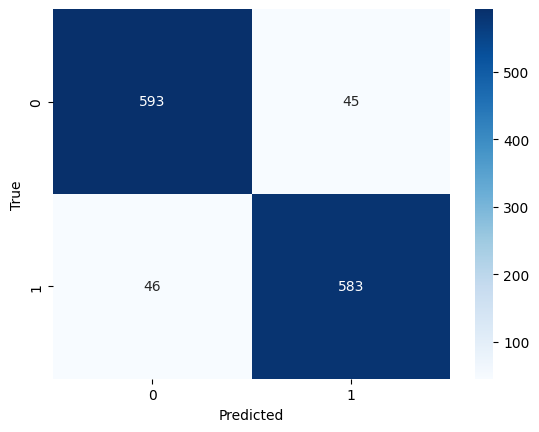

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       638
        REAL       0.93      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = pac.predict(tfidf_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


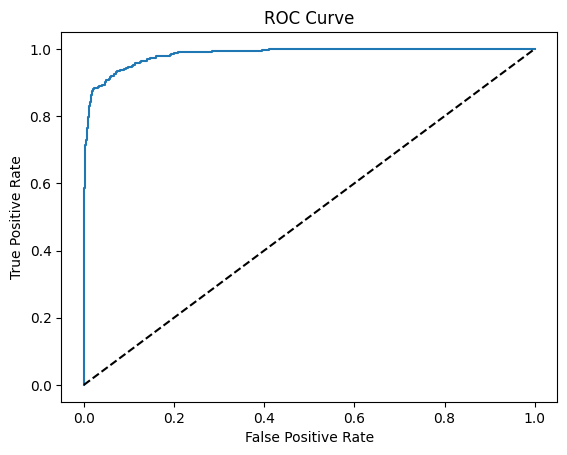

AUC: 0.98


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


y_test_binary = np.where(y_test == 'FAKE', 0, 1)
decision_scores = pac.decision_function(tfidf_test)

# Convert the confidence scores into probabilities using the sigmoid function
y_prob = 1 / (1 + np.exp(-decision_scores))

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test_binary, y_prob)
print(f'AUC: {auc_score:.2f}')


In [89]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[593,  45],
       [ 46, 583]], dtype=int64)